In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
df = pd.read_csv("adult.csv", na_values=['#NAME?'])
df_copy = df.copy()

In [59]:
df.shape

(5000, 15)

In [60]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,NaN,0,0,40,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4952 non-null   float64
 1   workclass       5000 non-null   object 
 2   fnlwgt          4893 non-null   float64
 3   education       5000 non-null   object 
 4   education_num   4943 non-null   float64
 5   marital_status  5000 non-null   object 
 6   occupation      5000 non-null   object 
 7   relationship    5000 non-null   object 
 8   race            4736 non-null   object 
 9   sex             4953 non-null   object 
 10  capital_gain    5000 non-null   int64  
 11  capital_loss    5000 non-null   int64  
 12  hours_per_week  5000 non-null   int64  
 13  native_country  5000 non-null   object 
 14  income          5000 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 586.1+ KB


In [6]:
# check age na values

In [71]:
df.isnull().sum()

age                48
workclass           0
fnlwgt            107
education           0
education_num      57
marital_status      0
occupation          0
relationship        0
race              264
sex                47
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
income              0
dtype: int64

In [72]:
# replace age null values with mean age

In [76]:
census = df.copy()

In [78]:
census.shape

(5000, 15)

In [79]:
# drop the na values

In [80]:
census = census.dropna(axis=0, subset=['sex', 'age'])

In [82]:
census.shape

(4905, 15)

In [84]:
census.isnull().sum()

age                 0
workclass           0
fnlwgt            106
education           0
education_num      57
marital_status      0
occupation          0
relationship        0
race              259
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
income              0
dtype: int64

In [85]:
census.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [87]:
census['workclass'] = census['workclass'].replace('?', 'Unknown')

In [88]:
census['workclass'].value_counts()

Private             3368
Self-emp-not-inc     375
Local-gov            326
Unknown              326
State-gov            187
Self-emp-inc         179
Federal-gov          143
Without-pay            1
Name: workclass, dtype: int64

In [89]:
census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [90]:
census['education'].value_counts()

HS-grad         1564
Some-college    1089
Bachelors        805
Masters          248
Assoc-voc        213
11th             194
Assoc-acdm       161
10th             141
7th-8th           95
Prof-school       88
9th               73
?                 57
12th              54
Doctorate         53
5th-6th           42
1st-4th           21
Preschool          7
Name: education, dtype: int64

In [91]:
census['education']= census['education'].replace('?', 'Unknown')

In [92]:
census['education'].value_counts()

HS-grad         1564
Some-college    1089
Bachelors        805
Masters          248
Assoc-voc        213
11th             194
Assoc-acdm       161
10th             141
7th-8th           95
Prof-school       88
9th               73
Unknown           57
12th              54
Doctorate         53
5th-6th           42
1st-4th           21
Preschool          7
Name: education, dtype: int64

In [93]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4905 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4905 non-null   object 
 1   workclass       4905 non-null   object 
 2   fnlwgt          4799 non-null   float64
 3   education       4905 non-null   object 
 4   education_num   4848 non-null   float64
 5   marital_status  4905 non-null   object 
 6   occupation      4905 non-null   object 
 7   relationship    4905 non-null   object 
 8   race            4646 non-null   object 
 9   sex             4905 non-null   object 
 10  capital_gain    4905 non-null   int64  
 11  capital_loss    4905 non-null   int64  
 12  hours_per_week  4905 non-null   int64  
 13  native_country  4905 non-null   object 
 14  income          4905 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 613.1+ KB


In [98]:
census['education_num'].value_counts().sort_values

<bound method Series.sort_values of 9.0     1564
10.0    1089
13.0     805
14.0     248
11.0     213
7.0      194
12.0     161
6.0      141
4.0       95
15.0      88
5.0       73
8.0       54
16.0      53
3.0       42
2.0       21
1.0        7
Name: education_num, dtype: int64>

In [99]:
# check if any na in marital status

In [100]:
census['marital_status'].value_counts()

Married-civ-spouse       2230
Never-married            1633
Divorced                  661
Widowed                   156
Separated                 155
Married-spouse-absent      65
Married-AF-spouse           5
Name: marital_status, dtype: int64

In [101]:
census['occupation'].value_counts()

Prof-specialty       610
Exec-managerial      609
Craft-repair         608
Sales                575
Adm-clerical         567
Other-service        486
?                    326
Machine-op-inspct    305
Transport-moving     239
Handlers-cleaners    193
Farming-fishing      141
Tech-support         138
Protective-serv       88
Priv-house-serv       18
Armed-Forces           2
Name: occupation, dtype: int64

In [102]:
census['occupation']= census['occupation'].replace('?', 'Unknown')

In [103]:
census['occupation'].value_counts()

Prof-specialty       610
Exec-managerial      609
Craft-repair         608
Sales                575
Adm-clerical         567
Other-service        486
Unknown              326
Machine-op-inspct    305
Transport-moving     239
Handlers-cleaners    193
Farming-fishing      141
Tech-support         138
Protective-serv       88
Priv-house-serv       18
Armed-Forces           2
Name: occupation, dtype: int64

In [104]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4905 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4905 non-null   object 
 1   workclass       4905 non-null   object 
 2   fnlwgt          4799 non-null   float64
 3   education       4905 non-null   object 
 4   education_num   4848 non-null   float64
 5   marital_status  4905 non-null   object 
 6   occupation      4905 non-null   object 
 7   relationship    4905 non-null   object 
 8   race            4646 non-null   object 
 9   sex             4905 non-null   object 
 10  capital_gain    4905 non-null   int64  
 11  capital_loss    4905 non-null   int64  
 12  hours_per_week  4905 non-null   int64  
 13  native_country  4905 non-null   object 
 14  income          4905 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 613.1+ KB


In [108]:
census['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [109]:
census['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', nan,
       'Other'], dtype=object)

In [110]:
census['race'].isna().sum()

259

In [112]:
census['race'] = census['race'].replace(np.nan, 'Unknown')

In [113]:
census['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Unknown', 'Other'], dtype=object)

In [114]:
census['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [118]:
census.isna().sum()

age                 0
workclass           0
fnlwgt            106
education           0
education_num      57
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
income              0
dtype: int64

In [119]:
census['fnlwgt'] = census['fnlwgt'].replace(np.nan, np.mean)

In [120]:
census.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
education_num     57
marital_status     0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [121]:
census['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'France', 'El-Salvador', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland'], dtype=object)

In [122]:
census['native_country'] = census['native_country'].replace('?', 'Unknown')

In [128]:
census['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Unknown', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'France', 'El-Salvador', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland'], dtype=object)

In [129]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4905 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4905 non-null   object 
 1   workclass       4905 non-null   object 
 2   fnlwgt          4905 non-null   object 
 3   education       4905 non-null   object 
 4   education_num   4848 non-null   float64
 5   marital_status  4905 non-null   object 
 6   occupation      4905 non-null   object 
 7   relationship    4905 non-null   object 
 8   race            4905 non-null   object 
 9   sex             4905 non-null   object 
 10  capital_gain    4905 non-null   int64  
 11  capital_loss    4905 non-null   int64  
 12  hours_per_week  4905 non-null   int64  
 13  native_country  4905 non-null   object 
 14  income          4905 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 613.1+ KB


In [130]:
# impute education numbers remove education numbers column
# this is the easy way

In [147]:
census_csv = census.to_csv('census_cleaned.csv', index=False)

In [185]:
cdf = pd.read_csv('census_cleaned.csv')

In [186]:
cdf.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [187]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4905 entries, 0 to 4904
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             4905 non-null   int64 
 1   workclass       4905 non-null   object
 2   fnlwgt          4905 non-null   int64 
 3   education       4905 non-null   object
 4   marital_status  4905 non-null   object
 5   occupation      4905 non-null   object
 6   relationship    4905 non-null   object
 7   race            4905 non-null   object
 8   sex             4905 non-null   object
 9   capital_gain    4905 non-null   int64 
 10  capital_loss    4905 non-null   int64 
 11  hours_per_week  4905 non-null   int64 
 12  native_country  4905 non-null   object
 13  income          4905 non-null   object
dtypes: int64(5), object(9)
memory usage: 536.6+ KB


In [188]:
# create a category df
cdf_cat_df = cdf[['workclass','education','marital_status','occupation','relationship','race','sex','native_country']]

In [189]:
cdf_cat_df.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [190]:
cdf_num_df = cdf.drop(['workclass','education','marital_status','occupation','relationship','race','sex','native_country'], axis=1)

In [191]:
cdf_num_df.columns

Index(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week',
       'income'],
      dtype='object')

In [192]:
cdf_num_df.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,income
0,39,77516,2174,0,40,<=50K
1,50,83311,0,0,13,<=50K
2,38,215646,0,0,40,<=50K
3,28,338409,0,0,40,<=50K
4,37,284582,0,0,40,<=50K


In [193]:
# convert cdf category columns - one hot encoding

In [194]:
cdf_cat_one_hot = pd.get_dummies(cdf_cat_df)

In [195]:
cdf_cat_one_hot.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay,education_10th,education_11th,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Unknown,native_country_Vietnam,native_country_Yugoslavia
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [196]:
# concat cat and num data frames into one dataframe

In [197]:
data = pd.concat([cdf_cat_one_hot, cdf_num_df], axis=1)

In [198]:
data.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay,education_10th,education_11th,...,native_country_United-States,native_country_Unknown,native_country_Vietnam,native_country_Yugoslavia,age,fnlwgt,capital_gain,capital_loss,hours_per_week,income
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,39,77516,2174,0,40,<=50K
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,50,83311,0,0,13,<=50K
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,38,215646,0,0,40,<=50K
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,28,338409,0,0,40,<=50K
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,37,284582,0,0,40,<=50K


In [199]:
y = data.pop('income')

# Logistic Regression

In [261]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

In [213]:
# function that fits and predicts
def fit_predict(logit,X_train, X_test, y_train, y_test):
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_test)
    print(accuracy_score(y_test, y_pred))

In [219]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [220]:
logit = LogisticRegression()

In [225]:
print("Accuracy with Logistic Regression", end=': ')
fit_predict(logit, X_train, X_test, y_train, y_test)

Accuracy with Logistic Regression: 0.8063200815494393


# Decision Tree

In [227]:
tree = DecisionTreeClassifier()

In [229]:
print("Accuracy with Decision Tree", end=': ')
fit_predict(tree, X_train, X_test, y_train, y_test)

Accuracy with Decision Tree: 0.7961264016309888


# Random Forest

In [230]:
forest = RandomForestClassifier()

In [231]:
print("Accuracy with Random Forest", end=': ')
fit_predict(forest, X_train, X_test, y_train, y_test)

Accuracy with Random Forest: 0.8399592252803262


# KNN classifier

In [232]:
knn = KNeighborsClassifier()

In [233]:
print("Accuracy with K Nearest Neighbor", end=': ')
fit_predict(knn, X_train, X_test, y_train, y_test)

Accuracy with K Nearest Neighbor: 0.7757390417940877


# Let's scale the data and check the accuracy

In [235]:
scaler = StandardScaler()

In [236]:
scaled_data = scaler.fit_transform(data)

In [239]:
scaled_data # its an numpy array

array([[-0.17328993, -0.26682313, -1.48029785, ...,  0.15897891,
        -0.22897729, -0.04277708],
       [-0.17328993, -0.26682313, -1.48029785, ..., -0.14663013,
        -0.22897729, -2.26965701],
       [-0.17328993, -0.26682313,  0.67553972, ..., -0.14663013,
        -0.22897729, -0.04277708],
       ...,
       [-0.17328993, -0.26682313,  0.67553972, ..., -0.14663013,
        -0.22897729, -0.04277708],
       [-0.17328993, -0.26682313, -1.48029785, ..., -0.14663013,
        -0.22897729, -0.04277708],
       [-0.17328993,  3.74780099, -1.48029785, ..., -0.14663013,
        -0.22897729,  1.19437844]])

In [240]:
SX_train, SX_test, sy_train, sy_test = train_test_split(scaled_data, y, test_size=0.2)

In [241]:
print("Accuracy with Scaled Data in KNN", end=": ")
fit_predict(knn, SX_train, SX_test, sy_train, sy_test)

Accuracy with Scaled Data in KNN: 0.817533129459735


In [242]:
# Lets check the error rate

error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(SX_train, sy_train)
    pred_i = knn.predict(SX_test)
    error_rate.append(np.mean(pred_i != sy_test))

In [246]:
for i,j in enumerate(error_rate):
    print(i, '--', j)

0 -- 0.23649337410805302
1 -- 0.199796126401631
2 -- 0.1926605504587156
3 -- 0.1946992864424057
4 -- 0.18246687054026503
5 -- 0.18144750254842
6 -- 0.17533129459734964
7 -- 0.17940876656472987
8 -- 0.1712538226299694
9 -- 0.17533129459734964
10 -- 0.15698267074413863
11 -- 0.16411824668705402
12 -- 0.16106014271151886
13 -- 0.16309887869520898
14 -- 0.1620795107033639
15 -- 0.16615698267074414
16 -- 0.1600407747196738
17 -- 0.1580020387359837
18 -- 0.16106014271151886
19 -- 0.1651376146788991
20 -- 0.1600407747196738
21 -- 0.1600407747196738
22 -- 0.15392456676860347
23 -- 0.1488277268093782
24 -- 0.14678899082568808
25 -- 0.145769622833843
26 -- 0.145769622833843
27 -- 0.1488277268093782
28 -- 0.15086646279306828
29 -- 0.14780835881753313
30 -- 0.1529051987767584
31 -- 0.15392456676860347
32 -- 0.1529051987767584
33 -- 0.15494393476044852
34 -- 0.15392456676860347
35 -- 0.15392456676860347
36 -- 0.15392456676860347
37 -- 0.1559633027522936
38 -- 0.15392456676860347


Text(0, 0.5, 'Error Rate')

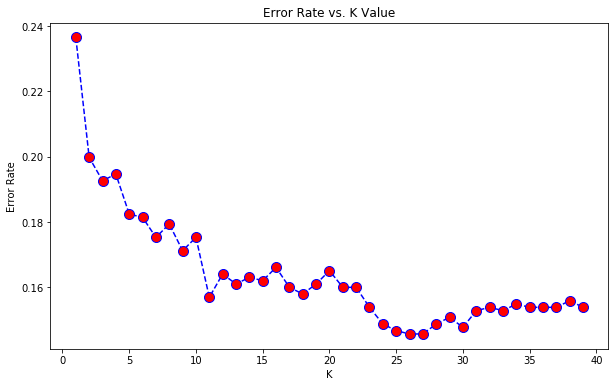

In [244]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [264]:
# define function check accuracy for knn

accuracy_score_list = []

def fit_KNN (n_neighbors):
    global accuracy_score_list
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(SX_train, sy_train)
    y_pred = knn.predict(SX_test)
    accuracy = accuracy_score(sy_test, y_pred)
    print(accuracy)
    accuracy_score_list.append(accuracy)

In [265]:

for i in range(1,40):
    print("Accuracy using K =", i, end = ': ')
    fit_KNN(i)
    

Accuracy using K = 1: 0.763506625891947
Accuracy using K = 2: 0.800203873598369
Accuracy using K = 3: 0.8073394495412844
Accuracy using K = 4: 0.8053007135575942
Accuracy using K = 5: 0.817533129459735
Accuracy using K = 6: 0.81855249745158
Accuracy using K = 7: 0.8246687054026504
Accuracy using K = 8: 0.8205912334352702
Accuracy using K = 9: 0.8287461773700305
Accuracy using K = 10: 0.8246687054026504
Accuracy using K = 11: 0.8430173292558614
Accuracy using K = 12: 0.835881753312946
Accuracy using K = 13: 0.8389398572884812
Accuracy using K = 14: 0.836901121304791
Accuracy using K = 15: 0.8379204892966361
Accuracy using K = 16: 0.8338430173292558
Accuracy using K = 17: 0.8399592252803262
Accuracy using K = 18: 0.8419979612640163
Accuracy using K = 19: 0.8389398572884812
Accuracy using K = 20: 0.8348623853211009
Accuracy using K = 21: 0.8399592252803262
Accuracy using K = 22: 0.8399592252803262
Accuracy using K = 23: 0.8460754332313966
Accuracy using K = 24: 0.8511722731906218
Accuracy

Text(0, 0.5, 'Accuracy Score')

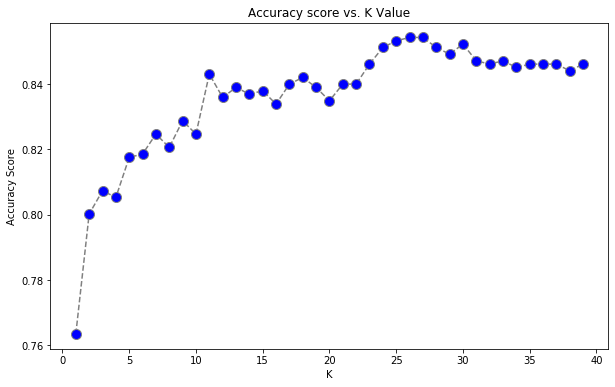

In [266]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_score_list,color='grey', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

# Key finding: KNN performs the best in classifying with accuracy of 0.845 for a K value of 27